In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

# Load the CSV file.
df = pd.read_csv("../data/heart.csv")

# Display basic information.
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Basic dataset overview.
print("----- INFO -----")
print(df.info())

print("\n----- DESCRIBE -----")
display(df.describe())

print("\n----- MISSING VALUES -----")
print(df.isnull().sum())

print("\n----- TARGET BALANCE (HeartDisease) -----")
print(df['HeartDisease'].value_counts())

print("\n----- GENDER BALANCE -----")
print(df['Sex'].value_counts())

----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

----- DESCRIBE -----


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



----- MISSING VALUES -----
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

----- TARGET BALANCE (HeartDisease) -----
HeartDisease
1    508
0    410
Name: count, dtype: int64

----- GENDER BALANCE -----
Sex
M    725
F    193
Name: count, dtype: int64


In [6]:
# One-hot encode categorical variables for Logistic Regression.
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

df_encoded.head()

Shape before encoding: (918, 12)
Shape after encoding: (918, 16)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target.
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Train/test split (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((734, 15), (184, 15))

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline: scale features -> logistic regression.
log_reg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000))
])

# Train the model.
log_reg_clf.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


Accuracy: 0.8858695652173914
Precision: 0.8715596330275229
Recall: 0.9313725490196079
F1 Score: 0.9004739336492891
ROC-AUC: 0.9296987087517934

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



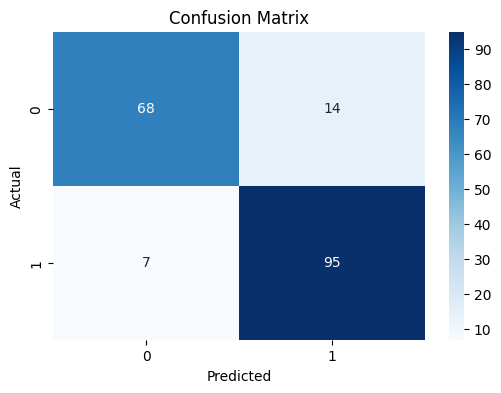

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions.
y_pred = log_reg_clf.predict(X_test)
y_prob = log_reg_clf.predict_proba(X_test)[:, 1]

# Metrics.
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC:", auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
import numpy as np
import pandas as pd

# Get coefficient names (after encoding).
feature_names = X_train.columns

# Extract coefficients from the trained logistic regression model.
coefficients = log_reg_clf.named_steps["log_reg"].coef_[0]

# Create a DataFrame for easy viewing.
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Sort by absolute value (largest impact first).
coef_df["AbsCoeff"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="AbsCoeff", ascending=False)

coef_df

,Feature,Coefficient,AbsCoeff
8,ChestPainType_NAP,-0.771173,0.771173
14,ST_Slope_Up,-0.751308,0.751308
7,ChestPainType_ATA,-0.646178,0.646178
2,Cholesterol,-0.497542,0.497542
6,Sex_M,0.497374,0.497374
13,ST_Slope_Flat,0.488255,0.488255
12,ExerciseAngina_Y,0.441838,0.441838
3,FastingBS,0.434087,0.434087
9,ChestPainType_TA,-0.333063,0.333063
5,Oldpeak,0.269665,0.269665


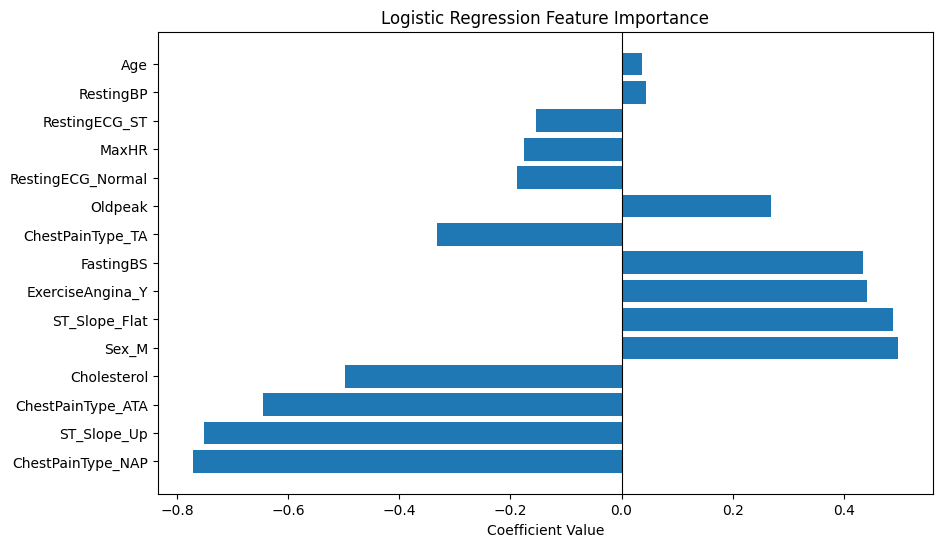

In [11]:
# Plot logistic regression coefficients (importance).
plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance")
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

<Figure size 800x600 with 0 Axes>

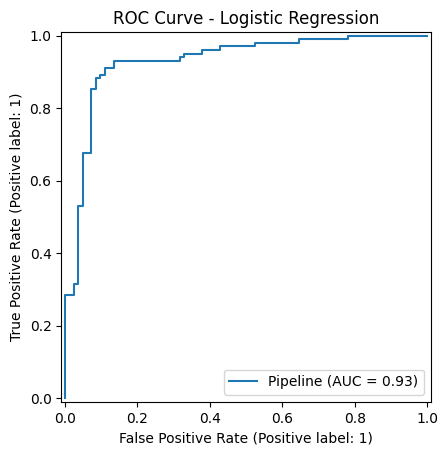

In [12]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(log_reg_clf, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

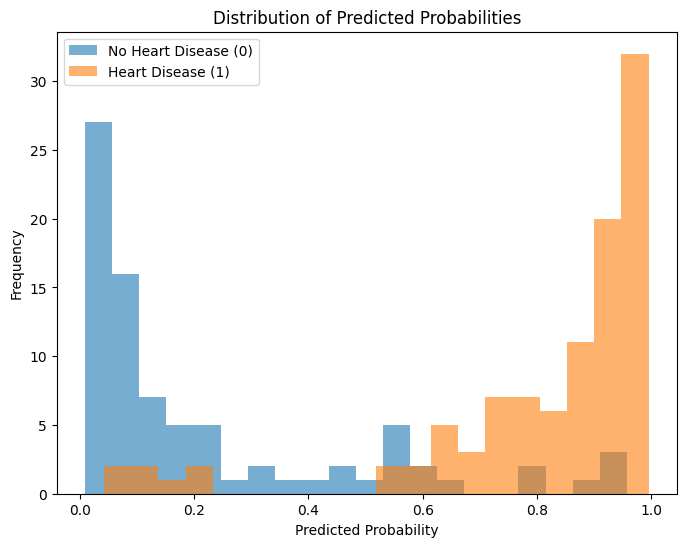

In [13]:
plt.figure(figsize=(8,6))
plt.hist(y_prob[y_test==0], bins=20, alpha=0.6, label="No Heart Disease (0)")
plt.hist(y_prob[y_test==1], bins=20, alpha=0.6, label="Heart Disease (1)")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.legend()
plt.show()

## Summary

The logistic regression model performed strongly, achieving an accuracy of 0.886 and an AUC of 0.93. 
Key predictors of heart disease included exercise-induced angina, flat ST slope, and male sex, 
while non-anginal and atypical chest pain types decreased risk. 
The probability plots and confusion matrix show good separation between classes and balanced performance. 
These findings will be further evaluated and compared with other team models (Decision Trees, Gradient Boosting) 
in the full project report.